In [47]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [48]:
data = pd.read_csv('/content/f2.csv')
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


In [50]:
# changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [51]:
#checking for null values
data.isna().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil_Type,0
Crop_Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer,0


In [52]:
data['Fertilizer'].unique()

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-10'],
      dtype=object)

In [54]:
data.drop('Crop_Type',axis=1,inplace=True)
data

,Temparature,Humidity,Moisture,Soil_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,90,49,36,Urea
1,25,84,32,Loamy,66,59,36,Urea
2,33,64,50,Loamy,41,0,0,Urea
3,34,65,54,Loamy,38,0,0,Urea
4,38,72,51,Loamy,39,0,0,Urea
...,...,...,...,...,...,...,...,...
547,12,95,42,Sandy,11,14,5,10-10-10
548,12,95,42,Sandy,11,14,5,10-10-10
549,27,80,31,Clayey,19,21,6,10-10-10
550,27,80,31,Clayey,19,21,6,10-10-10


In [55]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,552.000000,552.000000,552.000000,552,552.000000,552.000000,552.000000,552
unique,NaN,NaN,NaN,5,NaN,NaN,NaN,14
top,NaN,NaN,NaN,Loamy,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,192,NaN,NaN,NaN,108
mean,28.630435,64.557971,42.840580,NaN,28.521739,10.144928,21.115942,NaN
std,5.088082,11.880236,11.507275,NaN,29.121989,13.456956,14.920514,NaN
min,0.000000,50.000000,25.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,26.000000,54.000000,33.000000,NaN,10.000000,0.000000,8.000000,NaN
50%,29.000000,62.000000,41.000000,NaN,15.000000,0.000000,20.000000,NaN
75%,32.000000,68.000000,51.000000,NaN,37.000000,18.000000,36.000000,NaN


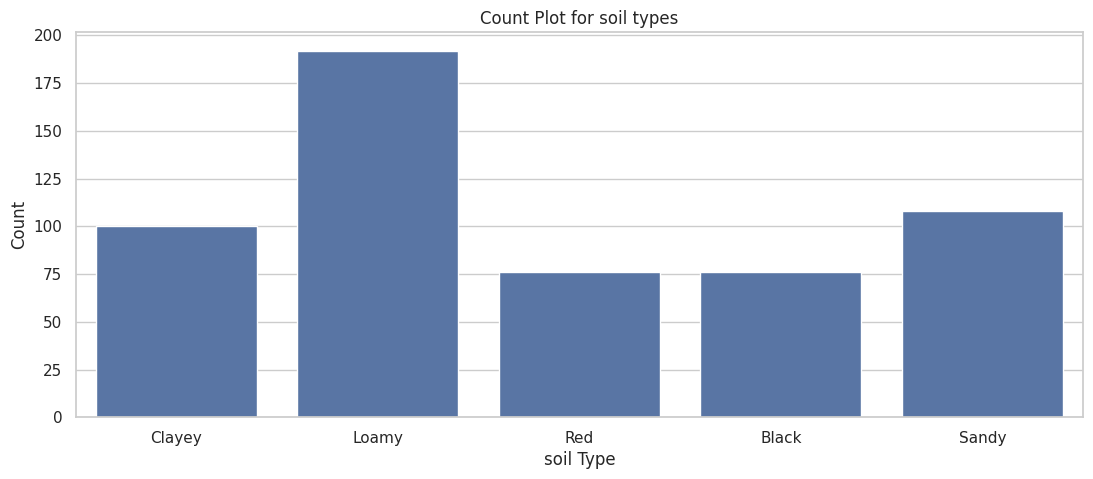

In [59]:
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
sns.countplot(data=data, x='Soil_Type')
plt.title('Count Plot for soil types')
plt.xlabel('soil Type')
plt.ylabel('Count')
plt.show()

In [60]:
#The plot that shows the count (frequency) of each unique soil type in the dataset
#The x-axis represents the different soil types.
#The y-axis represents the count (the number of occurrences) of each soil type in the dataset

<Axes: >

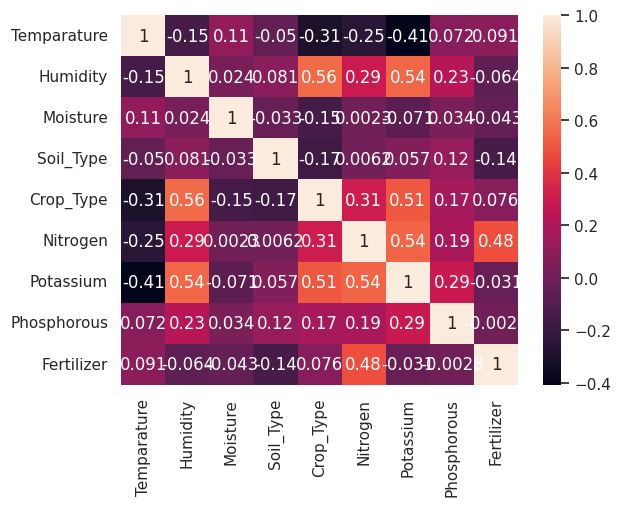

In [ ]:
#Heatmap for Correlation Analysis
sns.heatmap(data.corr(),annot=True)

In [61]:
#here is no such correlation between any of variables..

In [62]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder
#it  transforming non-numeric data into a numeric format

In [63]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [64]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-10-10,0
10-26-26,1
14-14-14,2
14-35-14,3
15-15-15,4
17-17-17,5
20-20,6
28-28,7
DAP,8


In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Fertilizer'],axis=1),data.Fertilizer,test_size=0.2,random_state=1)

In [67]:
acc = [] # Test
model = []
acc1=[] # train

In [68]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

ds = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
ds.fit(x_train,y_train)

predicted_values_test = ds.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values_test)
acc.append(x)
model.append('Decision Tree')

predicted_values = ds.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

print("DecisionTrees's Accuracy is: ", x*100, y*100)

print(classification_report(y_test,predicted_values_test))

DecisionTrees's Accuracy is:  90.09009009009009 93.42403628117914
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.92      0.75      0.83        16
           9       0.00      0.00      0.00         1
          10       0.33      1.00      0.50         2
          11       0.00      0.00      0.00         3
          12       0.64      1.00      0.78         7
          13       1.00      0.94      0.97        18

    accuracy                           0.90       111
   macro avg       0.75      0.82      0.77       111
weighted avg  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values_test = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values_test)
acc.append(x)

predicted_values = NaiveBayes.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values_test))

Naive Bayes's Accuracy is:  0.9459459459459459 0.9319727891156463
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.88      0.88      0.88        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       0.60      1.00      0.75         3
          12       0.75      0.86      0.80         7
          13       1.00      0.83      0.91        18

    accuracy                           0.95       111
   macro avg       0.94      0.97      0.95       111
weighted avg  

In [70]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
# transform testing dataabs
X_test_norm = norm.transform(x_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)

predicted_values_test = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values_test)
acc.append(x)

predicted_values = SVM.predict(X_train_norm)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('SVM')
print("SVM's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values_test))

SVM's Accuracy is:  0.990990990990991 0.9931972789115646
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       0.75      1.00      0.86         3
          12       1.00      1.00      1.00         7
          13       1.00      0.94      0.97        18

    accuracy                           0.99       111
   macro avg       0.98      1.00      0.99       111
weighted avg       0.99

In [71]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train)

predicted_values_test = LogReg.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values_test)
acc.append(x)

predicted_values = LogReg.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values_test))

Logistic Regression's Accuracy is:  0.7657657657657657 0.8775510204081632
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00        10
           2       0.33      1.00      0.50         1
           3       0.90      0.75      0.82        12
           4       1.00      0.25      0.40         4
           5       0.67      1.00      0.80         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.58      0.69      0.63        16
           9       0.00      0.00      0.00         1
          10       0.50      0.50      0.50         2
          11       0.50      0.33      0.40         3
          12       0.00      0.00      0.00         7
          13       0.80      0.89      0.84        18

    accuracy                           0.77       111
   macro avg       0.66      0.64      0.61       111
weight

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [72]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values_test = RF.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values_test)
acc.append(x)

predicted_values = RF.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('RF')
print("RF's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values_test))

RF's Accuracy is:  1.0 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        18

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

In [73]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(RF,data,data.Fertilizer,cv=5)
print("Cross-validation score of RF is:",score)
score = cross_val_score(LogReg,data,data.Fertilizer,cv=5)
print("Cross-validation score of LogReg is:",score)
score = cross_val_score(SVM,data,data.Fertilizer,cv=5)
print("Cross-validation score of SVM is:",score)
score = cross_val_score(NaiveBayes,data,data.Fertilizer,cv=5)
print("Cross-validation score of NaiveBayes is:",score)
score = cross_val_score(ds, data, data.Fertilizer,cv=5)
print("Cross-validation score of ds is:",score)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation score of RF is: [1. 1. 1. 1. 1.]


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Cross-validation score of LogReg is: [0.96396396 0.94594595 0.97272727 0.8        0.9       ]
Cross-validation score of SVM is: [0.96396396 0.93693694 0.93636364 0.88181818 0.98181818]
Cross-validation score of NaiveBayes is: [1. 1. 1. 1. 1.]


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation score of ds is: [1. 1. 1. 1. 1.]


<ipython-input-74-285168b3da3b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

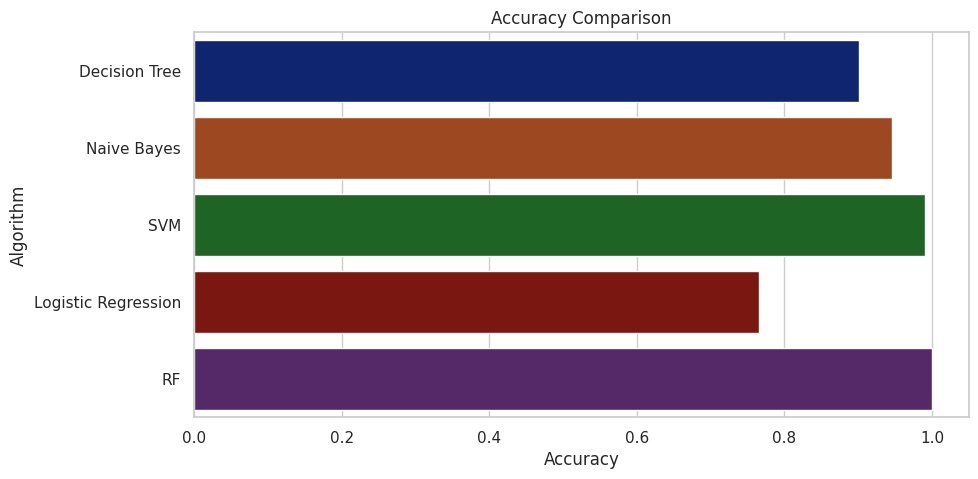

In [74]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [75]:
import pickle

with open("fertilizer.pkl", "wb") as f:
    pickle.dump(RF, f)
    pickle.dump(encode_crop, f)
    pickle.dump(encode_ferti, f)
    pickle.dump(encode_soil, f)